<a href="https://colab.research.google.com/github/HamzaQureshi12/My_Project_Code_For_Breast_Cancer_Classification/blob/main/Breast_Cancer_Classification_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing The Libraries:

In [ ]:
import os
import numpy as np
import pandas as pd

import tensorflow as tf

from sklearn.metrics import *

import matplotlib.pyplot as plt
import seaborn as sns

AUTOTUNE_SETTING = tf.data.experimental.AUTOTUNE
folds_data = pd.read_csv('/content/drive/MyDrive/Data Set/Folds.csv')
image_folder_path = '/content/drive/MyDrive/Data Set/BreaKHis_v1/'
tumor_classes = ['benign', 'malignant']

In [ ]:
folds_data = folds_data.rename(columns={'filename': 'path'})
folds_data['label'] = folds_data.path.apply(lambda x: x.split('/')[3])
folds_data['label_int'] = folds_data.label.apply(lambda x: tumor_classes.index(x))
folds_data['file_name'] = folds_data.path.apply(lambda x: x.split('/')[-1])
folds_data.head(3)


,fold,mag,grp,path,label,label_int,file_name
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,0,SOB_B_A-14-22549AB-100-001.png
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,0,SOB_B_A-14-22549AB-100-002.png
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,0,SOB_B_A-14-22549AB-100-003.png


Count of Benign    :  12400
Count of Malignant :  27145


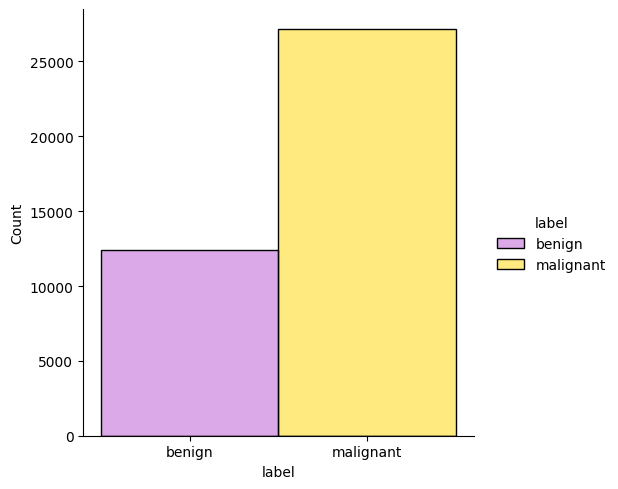

In [ ]:
# Defining colors for benign and malignant
ax = sns.displot(
    data=folds_data,
    x='label',
    hue='label',
    palette={'benign': 'mediumorchid', 'malignant': 'gold'}
)

# Displaying count of each label
print('Count of Benign    : ', folds_data[folds_data.label == 'benign'].label.count())
print('Count of Malignant : ', folds_data[folds_data.label == 'malignant'].label.count())


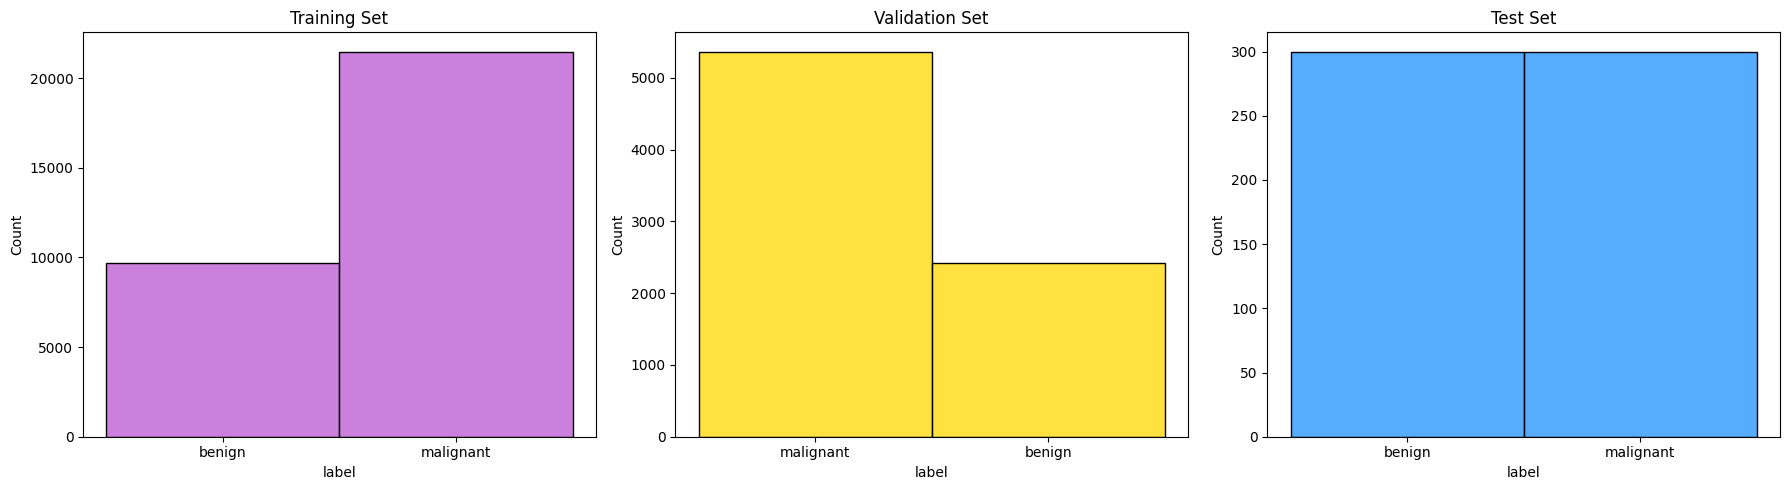

Training set
label
malignant    21481
benign        9675
Name: count, dtype: int64

Validation set
label
malignant    5364
benign       2425
Name: count, dtype: int64

Test set
label
benign       300
malignant    300
Name: count, dtype: int64


In [ ]:
# Remove 600 from dataset for testing
test_set = folds_data.groupby('label').sample(n=300)
train_set = folds_data.drop(test_set.index).reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

# Split training and validation set
validation_set = train_set.sample(frac=0.2)
train_set = train_set.drop(validation_set.index).reset_index(drop=True)
validation_set = validation_set.reset_index(drop=True)

# Assign sets and combine data
test_set['set'] = 'test'
train_set['set'] = 'train'
validation_set['set'] = 'valid'
combined_dataset = pd.concat([train_set, validation_set, test_set])

# Set up the figure with a row of three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot each distribution in a different color and assign to specific axes
sns.histplot(data=train_set, x='label', color='mediumorchid', ax=axes[0])
axes[0].set_title('Training Set')

sns.histplot(data=validation_set, x='label', color='gold', ax=axes[1])
axes[1].set_title('Validation Set')

sns.histplot(data=test_set, x='label', color='dodgerblue', ax=axes[2])
axes[2].set_title('Test Set')

# Show the plots in a row
plt.tight_layout()
plt.show()

# Print counts for each set
print('Training set')
print(train_set.label.value_counts())

print('\nValidation set')
print(validation_set.label.value_counts())

print('\nTest set')
print(test_set.label.value_counts())


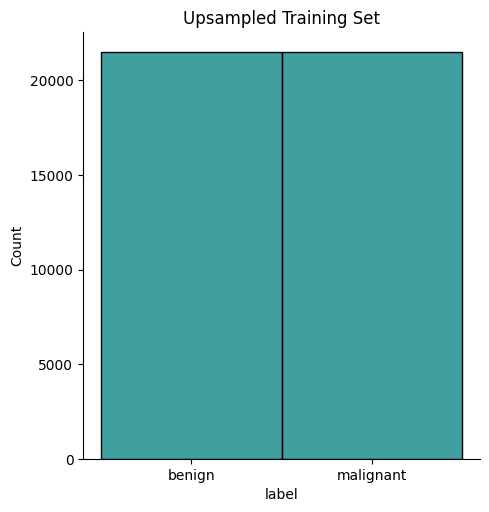

label
benign       21481
malignant    21481
Name: count, dtype: int64


In [ ]:
# Upsample training dataset
max_count = np.max(train_set.label.value_counts())
train_set = train_set.groupby('label').sample(n=max_count, replace=True).reset_index(drop=True)

# Plot distribution after upsampling
ax = sns.displot(data=train_set, x='label', color='teal')
ax.set(title='Upsampled Training Set')
plt.show()

# Display counts to verify upsampling
print(train_set.label.value_counts())
